In [ ]:
import numpy as np

# Define the joint distribution using a bivariate normal distribution
mean = [0, 0]
cov = [[1, 0.5], [0.5, 1]]

# Initialize the algorithm with some initial samples
automative_samples = np.random.multivariate_normal(mean, cov, size=1000)
#from above automative_samples one of the initial value is taken.
samples = {'temperature': [1], 'precipitation': [-1]}

num_samples = 10000
# Perform Gibbs sampling
for _ in range(num_samples):
    curr_precipitation = samples['precipitation'][-1]
    # Sample temperature from its conditional distribution given precipitation
    new_temperature = np.random.normal(curr_precipitation/2, np.sqrt(3/4))
     # Sample precipitation from its conditional distribution given temperature
    new_precipitation = np.random.normal(new_temperature/2, np.sqrt(3/4))
    # Update the samples
    samples['temperature'].append(new_temperature)
    samples['precipitation'].append(new_precipitation)

# Compute the mean and variance of the temperature and precipitation variables
mean_temp = np.mean(samples['temperature'])
var_temp = np.var(samples['temperature'])
mean_precip = np.mean(samples['precipitation'])
var_precip = np.var(samples['precipitation'])

print("The mean of temperature is: {}".format(mean_temp))
print("The mean of precipitation is: {}".format(mean_precip))
print("The variance of temperature is: {}".format(var_temp))
print("The variance of precipitation is: {}".format(var_precip))


The mean of temperature is: -0.032713263671292236
The mean of precipitation is: -0.02252904575796251
The variance of temperature is: 0.9917197677058021
The variance of precipitation is: 1.0135015377902235


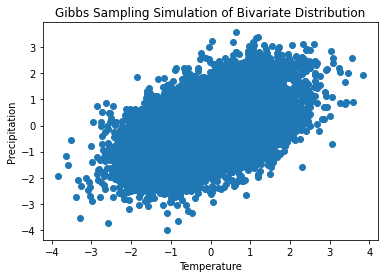

In [ ]:
import matplotlib.pyplot as plt
# Plot the samples as a scatter plot
plt.scatter(samples['temperature'], samples['precipitation'])
# Add labels and a title to the plot
plt.xlabel("Temperature")
plt.ylabel("Precipitation")
plt.title("Gibbs Sampling Simulation of Bivariate Distribution")
# Display the plot
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


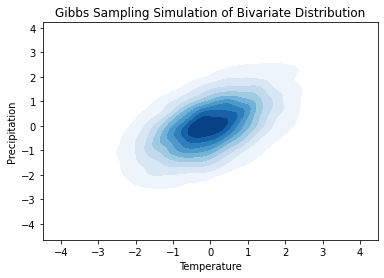

In [ ]:
import seaborn as sns
# Plot the samples using a contour plot
sns.kdeplot(samples['temperature'], samples['precipitation'], cmap="Blues", n_levels=10,shade=True,shade_lowest=False)
# Add labels and a title to the plot
plt.xlabel("Temperature")
plt.ylabel("Precipitation")
plt.title("Gibbs Sampling Simulation of Bivariate Distribution")
# Display the plot
plt.show()

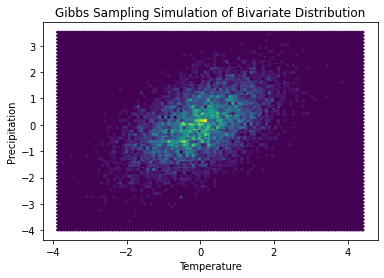

In [ ]:
import matplotlib.pyplot as plt
# Plot the samples as a scatter plot
plt.hexbin(samples['temperature'], samples['precipitation'])
# Add labels and a title to the plot
plt.xlabel("Temperature")
plt.ylabel("Precipitation")
plt.title("Gibbs Sampling Simulation of Bivariate Distribution")
# Display the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
#from above automative_samples one of the initial value is taken.
samples = {'temperature': [1], 'precipitation': [-1]}
figs = []
num_samples = 100
# Perform Gibbs sampling
for _ in range(num_samples):
    curr_precipitation = samples['precipitation'][-1]
    # Sample temperature from its conditional distribution given precipitation
    new_temperature = np.random.normal(curr_precipitation/2, np.sqrt(3/4))
     # Sample precipitation from its conditional distribution given temperature
    new_precipitation = np.random.normal(new_temperature/2, np.sqrt(3/4))
    # Update the samples
    samples['temperature'].append(new_temperature)
    samples['precipitation'].append(new_precipitation)

# Scatter plot
fig = plt.figure(figsize = (100,100))
def ani(coords):
     return plt.scatter([coords[0]],[coords[1]], color='g')

def frames():
    for acc_11_pos, acc_12_pos in zip(samples['temperature'], samples['precipitation']):
        yield acc_11_pos, acc_12_pos

ani = FuncAnimation(fig, ani, frames=frames, interval=1000)
plt.show()

<Figure size 7200x7200 with 0 Axes>

In [ ]:
!pip install gif
import numpy as np
import matplotlib.pyplot as plt
import gif
from IPython.display import Image
from random import random

In [5]:
def conditional_sampler(sampling_index, current_x, mean, cov):
    conditioned_index = 1 - sampling_index
    a = cov[sampling_index, sampling_index]
    b = cov[sampling_index, conditioned_index]
    c = cov[conditioned_index, conditioned_index]
    
    mu = mean[sampling_index] + (b * (current_x[conditioned_index] - mean[conditioned_index]))/c
    sigma = np.sqrt(a-(b**2)/c)
    new_x = np.copy(current_x)
    new_x[sampling_index] = np.random.randn()*sigma + mu
    return new_x
@gif.frame
def plot_samples(samples, num_samples, tmp_points, num_tmp, title="Gibbs Sampling", xlims=(-11, 11), ylims=(-11, 11)):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.gca()
    
    # Plot sampled points
    ax.scatter(samples[:num_samples, 0], samples[:num_samples, 1], c='b', s=10, label="Sampled Points")
    ax.scatter(samples[0, 0], samples[0, 1], marker='*', c='g', s=60, label="Initial Point")
    
    # Plot samples from conditional distribution
    ax.scatter(tmp_points[:num_tmp, 0], tmp_points[:num_tmp, 1], c='r', alpha=0.4, s=5, label="Temporary Points")
    
    # Keeping the axes scales same for good GIFS
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    
    # Plot lines
    if(num_tmp > 0):
        ax.plot([samples[num_samples-1, 0], tmp_points[num_tmp-1, 0]], 
                [samples[num_samples-1, 1], tmp_points[num_tmp-1, 1]], c='k', alpha=0.25)
    
    ax.legend(loc='upper left')
    ax.set_title(title)

In [6]:
def gibbs_sampler(initial_point, num_samples, mean, cov, create_gif=True):

    frames = []  # for GIF
    point = np.array(initial_point)
    samples = np.empty([num_samples+1, 2])  #sampled points
    samples[0] = point
    tmp_points = np.empty([num_samples, 2]) #inbetween points

    for i in range(num_samples):

        # Sample from p(x_0|x_1)
        point = conditional_sampler(0, point, mean, cov)
        tmp_points[i] = point
        if(create_gif):
            frames.append(plot_samples(samples, i+1, tmp_points, i+1, title="Num Samples: " + str(i)))
            
        # Sample from p(x_1|x_0)
        point = conditional_sampler(1, point, mean, cov)
        samples[i+1] = point
        if(create_gif):
            frames.append(plot_samples(samples, i+2, tmp_points, i+1, title="Num Samples: " + str(i+1)))
            
    if(create_gif):
        return samples, tmp_points, frames
    else:
        return samples, tmp_points

In [ ]:
initial_point = [-9.0, -9.0]
num_samples = 500
mean = np.array([0, 0])
cov = np.array([[10, 3], 
                [3, 5]])
samples, tmp_points, frames = gibbs_sampler(initial_point, num_samples, mean, cov, create_gif=True)
# Creating the GIF
gif.save(frames, "gibbs.gif", duration=150)
